# CMPT 423/820 
## Assignment 1 Question 7
* Seyedeh Mina Mousavifar
* 11279515
* sem311

In this question, we'll get do more with Pandas DataFrames, methods, indexing.  We'll also introduce the Seaborn package.

In [1]:
# this is the conventional import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1
Use Pandas function `read_csv()` to load the `iris.cvs` dataset.

In [2]:
# adding header to data, because csv file didn't have column names
iris = pd.read_csv('iris.csv', 
                   header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

### Task 2
There's a method called `density()` that uses MatPlotLib to create a slightly different kind of histogram (recall Question 6).  Behind the scenes, it's applying a statistical method called *density estimation* to create the plot; density estimation is something we will see (and have seen already!) in the course.  Pandas calls functions in MatPlotLib to create the plot; you could use MatPlotLib to enhance the plot, adding a title, or axis labels, etc. 

In the cell below, use the `density()` method to display a plot for the dataframe.  

**Hint:** Jupyter is aware of Pandas and MatPlotLib, and by default, Jupyter can display any plot if the command to create it is the last thing in a cell.  But it is common to call MatPlotLib function `plt.show()` if you want to force a plot to be shown.  

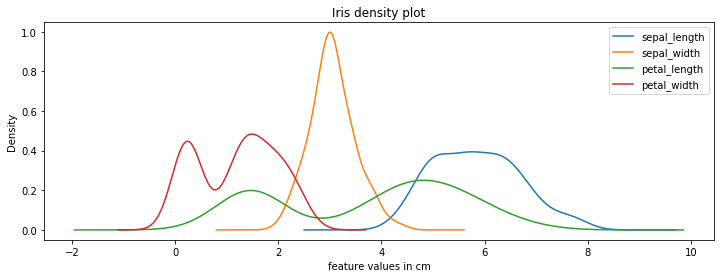

In [3]:
plot = iris.plot.density(figsize=(12, 4))

# adding plot axis label and title
plot = plot.set(xlabel="feature values in cm", title = 'Iris density plot')

### Task 3
The density plots from Task 2 are visualizations of the distribution of the four columns of data.  In effect, they are visualizations of four marginal probability distributions $P(X_i|Y)$, where the Xi is the column feature, and Y is the label.  

1. Using Pandas create 3 new DataFrames, by separating the data into three subsets: 
   * all the rows for `versicolor`
   * all the rows for `setosa`
   * all the rows for `virginica`

   Do this using Boolean array indexing; this technique works in Numpy, and Pandas.  

2. Then plot the density for each subset individually, using `density()` as above.

**Hint:** 
<pre>
sub1 = < expression to select all the rows whose label is 'versicolor' >
...
</pre>
Use Boolean array indexing to select the rows you want in your new dataframe.

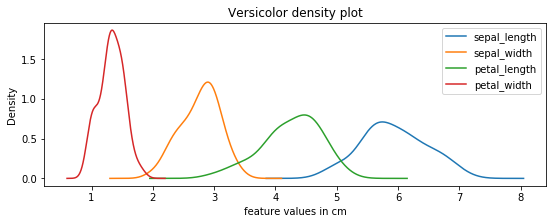

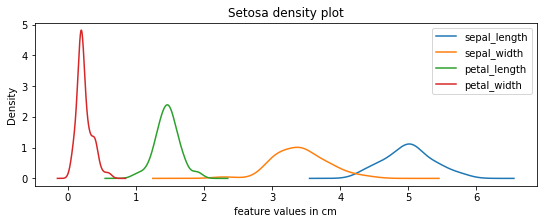

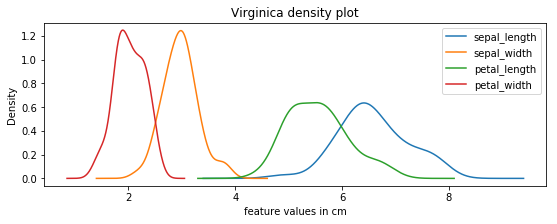

In [4]:
# Versicolor
# filtering based on sepecies
versicolor = iris[iris['species']=='versicolor']

# showing density plot
plot = versicolor.plot.density(figsize=(9, 3))
plot = plot.set(xlabel="feature values in cm", title = 'Versicolor density plot')

# Setosa
# filtering based on sepecies
setosa = iris[iris['species']=='setosa']

plot = setosa.plot.density(figsize=(9, 3))
plot = plot.set(xlabel="feature values in cm", title = 'Setosa density plot')

# Viriginica
# filtering based on sepecies
virginica = iris[iris['species']=='virginica']

# showing density plot
plot = virginica.plot.density(figsize=(9, 3))
plot = plot.set(xlabel="feature values in cm", title = 'Virginica density plot')

### Task 4
These densities are visualizations for conditional probability distributions, conditioned on the label (i.e., $P(X_i|setosa)$ for all i).  We can see that one of these species is really quite distinct from the others (consider the order of the 4 peaks).

In the above plots, the four numerical columns are visualized for each separate species.  We see columns 1-4 for each species.

It might be more useful to plot the density for $X_1$ for all three species in a single plot, to compare more easily the differences in the distribution of that column for a single species.

In the cell below, plot the density of $X_1$ for all three labels.  Then do similar plots for the other 3 numerical columns.

**Hint:**  There are many ways you could do this.  This exercise is to familiarize you with Pandas, and there's no single answer that the marker is looking for.  Remember to use Boolean array indexing!  One useful Pandas method is called `concat()`.  Also, you'll want to create dataframes with the data you want to visualize, using `density()`.

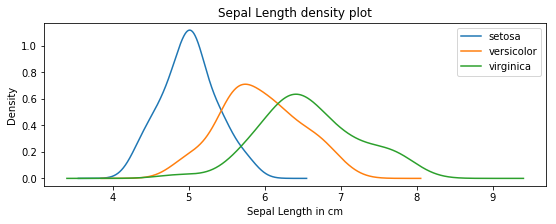

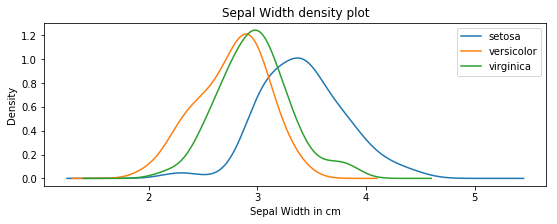

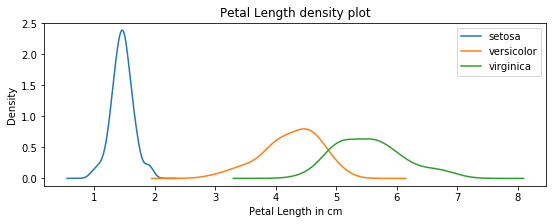

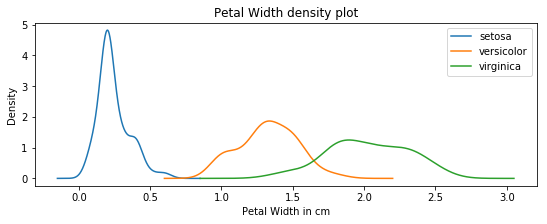

In [5]:
# Sepal length
# select only sepal_length and sepcies columns
sepal = iris.filter(items=['sepal_length', 'species'])

# creating plot
fig, ax = plt.subplots(figsize=(9, 3))

# adding each group to the plot
for label, df in sepal.groupby('species'):
    df.sepal_length.plot(kind="kde", ax=ax, label=label)

# adding plot axis label, title and legend
plt.title('Sepal Length density plot')
plt.xlabel('Sepal Length in cm')
plot = plt.legend()

# Sepal width
# select only sepal_width and sepcies columns
sepal = iris.filter(items=['sepal_width', 'species'])

fig, ax = plt.subplots(figsize=(9, 3))
for label, df in sepal.groupby('species'):
    df.sepal_width.plot(kind="kde", ax=ax, label=label)


plt.title('Sepal Width density plot')
plt.xlabel('Sepal Width in cm')
plot = plt.legend()

# Petal length
# select only petal_length and sepcies columns
sepal = iris.filter(items=['petal_length', 'species'])

fig, ax = plt.subplots(figsize=(9, 3))
for label, df in sepal.groupby('species'):
    df.petal_length.plot(kind="kde", ax=ax, label=label)


plt.title('Petal Length density plot')
plt.xlabel('Petal Length in cm')
plot = plt.legend()

# Petal width
# select only petal_width and sepcies columns
sepal = iris.filter(items=['petal_width', 'species'])

fig, ax = plt.subplots(figsize=(9, 3))
for label, df in sepal.groupby('species'):
    df.petal_width.plot(kind="kde", ax=ax, label=label)


plt.title('Petal Width density plot')
plt.xlabel('Petal Width in cm')
plot = plt.legend()


### Task 5
Task 4 was a lot of work.  Let's use Seaborn's `pairplot()` to visualize the data.  

**Hint:** Explore the Seaborn documentation, and see if you can get density graphs to appear on the diagonal.  Then compare the work you did in Task 4.

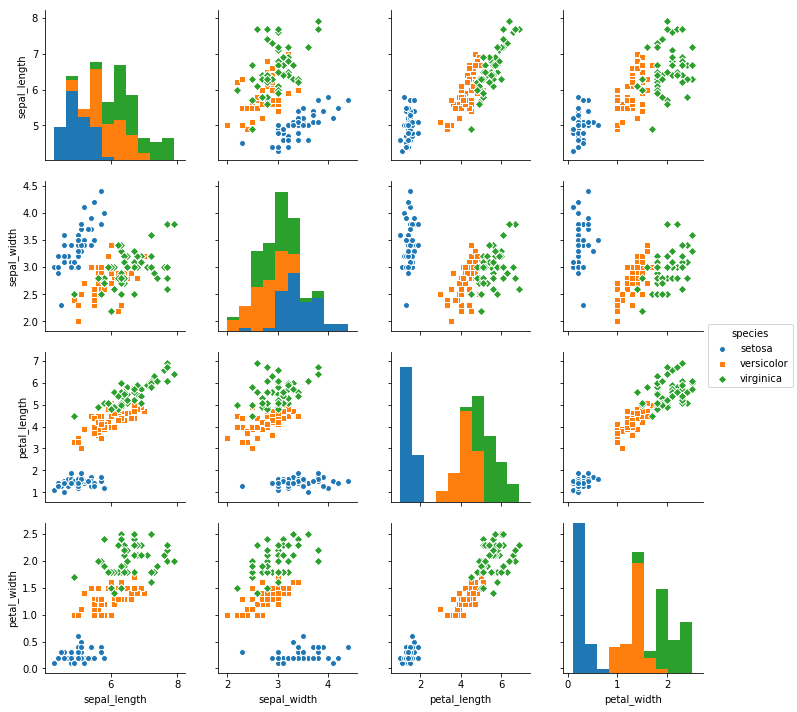

In [6]:
# hue is for setting plot aspects to use different colors, marker is for showing different shape for each aspect
plot = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

### Task 6
Explain what you see in the above visualization.  Make a few comments about the different kinds of plots, and any general trends or patterns you can see.  This is not a test!  I just want you to see what the visualization might say.
> The pairplot plots pairwise relationships in a dataset. The non-diagonal plots show scatter plots for species based on pairwise features, and the diagonal show the univariate distribution of the data for the specified feature.

> In many of the scatter plots above, the *Setosa* species, which is shown by blue colour, is most recognizable from the other groups in all aspects. In the density plots, I can see that *Setosa* has the smallest mean in *sepal_length*, *petal_length* and *petal_width*. Furthermore, in the density plot, the *Versicolor* species have smaller mean in *sepal_length*, *petal_length* and *petal_width* than *Virginica* species. Consequently, we can see that some features like *sepal_length*, *petal_length* and *petal_width* are suitable for classification because they have consistent results in different features; However, *sepal_width* doesn't follow such trends and even the groups in scatter plots in the second row are not as separate as other features. Moreover, in characteristics other than *sepal_width*, as the x-axis features increases, the y-axis feature increases in *Versicolor* and *Virginica* species. But *Setosa* doesn't follow this trend.

### What to hand in
Your version of this notebook named A1Q7.pdf, containing completed work above, and your name and student number at the top.

### Evaluation:
* 1 mark.  For Task 1, you used `read_csv()` to load a datafile into the notebook.
* 1 mark.  For Task 2, you used `density()` to display density estimation plots for the dataframe.
* 3 marks.  For Task 3, you used Boolean array indexing to create separate DataFrames (one for each label value) and then used `density()` to display density estimation for each dataframe.  
* 4 marks.  For Task 4, you plotted the density estimation for each of the columns in the original DataFrame, and you have 3 densities allowing you to compare the distribution for each label in one plot.  You have 4 such plots.
* 1 mark.  For Task 5, you used Seaborn's `pairplot()` to display visualization of the original dataframe.  
* 2 marks.  For Task 6, you commented on the two kinds of plots, and what they represent.  You also made some observations about some patterns in the data.